### Exploration/Analysis of Minneapolis Winter Weather 1880-2020
data sourced from Minnesota DNR

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

Start with some data cleaning to prepare for analysis.

In [2]:
# Load file
df = pd.read_csv('msp_historical_weather.csv')
# Remove first column
df = df.drop(columns=['Unnamed: 0'])
# Show sample
df.sample()
#Check datatypes
df.dtypes
# check for na's
df.isnull().sum()
# drop where tempature is missing
df = df.loc[150:]
df.sample()
#find and replace T with .01
df = df.replace('T',.01)
# replace missing values with Nan
df = df.replace('M','NaN')
# show sample
df.sample()

,Date,MaxTemp,MinTemp,Precip,Snow,SnowDepth,datetime,day,month,year,season
26310,5/17/2009,67,41,0,0,0,2009-05-17,17,5,2009,Spring


Tempature Trends in Winter

In [4]:
# Make DF just for tempatures
temps = df[['MaxTemp','MinTemp','Date','day','month','year','season','datetime']]
# Convert temps from Objects to Numbers
# Get rid of NaN values
temps=temps[(temps['MaxTemp']!= 'NaN') & (temps['MinTemp'] != 'NaN')]
# Conver MaxTemp and MinTemp to numerical values
temps.MaxTemp=pd.to_numeric(temps.MaxTemp)
temps.MinTemp=pd.to_numeric(temps.MinTemp)
#Apply to numeric ignoring uneeded columns
temps = temps.apply(pd.to_numeric, errors='ignore')
# Check dateatypes to confirm that Temps are Integers
temps.dtypes

MaxTemp      int64
MinTemp      int64
Date        object
day          int64
month        int64
year         int64
season      object
datetime    object
dtype: object

Now add some information to better inform analysis. Found the average Tempature and high and Low Tempatures.

In [5]:
# add column with average tempature
temps['AveTemp'] = (temps['MaxTemp'] + temps['MinTemp']) / 2
# add column with differance between High and Low Temp
temps['HighLowDiff'] = (temps['MaxTemp'] - temps['MinTemp'])
# Show sample 
temps.sample(5)
# subset just winter
winter = temps[temps['season']=='Winter']
winter.sample(5)
# Now just segment out January
jan = winter[winter['month']==1]
# Show sample
jan.sample(5)

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
11490,29,21,1/30/1998,30,1,1998,Winter,1998-01-30,25.0,8
1109,22,6,1883-01-27,27,1,1883,Winter,1883-01-27,14.0,16
6057,22,11,1/12/1938,12,1,1938,Winter,1938-01-12,16.5,11
12842,33,30,1/28/2013,28,1,2013,Winter,2013-01-28,31.5,3
8602,3,-15,1/30/1966,30,1,1966,Winter,1966-01-30,-6.0,18


Show summary stats for Winter

Show sum stats for January

In [13]:
jan.describe()

,MaxTemp,MinTemp,day,month,year,AveTemp,HighLowDiff
count,4588.000000,4588.000000,4588.000000,4588.0,4588.000000,4588.000000,4588.000000
mean,21.820837,4.776373,16.000000,1.0,1946.500000,13.298605,17.044464
std,13.446458,14.620544,8.945247,0.0,42.727601,13.521527,7.603181
min,-20.000000,-41.000000,1.000000,1.0,1873.000000,-29.000000,1.000000
25%,12.000000,-6.000000,8.000000,1.0,1909.750000,3.500000,12.000000
50%,23.000000,5.000000,16.000000,1.0,1946.500000,14.500000,16.000000
75%,32.000000,16.000000,24.000000,1.0,1983.250000,24.000000,21.000000
max,58.000000,42.000000,31.000000,1.0,2020.000000,50.000000,49.000000


# Global Tempature Changes
Has global warming changed the average tempatures in Minneapolis over the last 100 years?


In [6]:
jan.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
1717,10,-12,1890-01-03,3,1,1890,Winter,1890-01-03,-1.0,22


In [ ]:
# make df based on dates
#old_times = 
# Old times for years 1890-1920
old_times = jan.query("(year > 1889) and (year < 1921)")
old_times['time'] = '1890-1920'
old_times['split'] = 'old'
# Present for years 1990-1920
present = jan.query("(year > 1989) and (year < 2021)")
present['time']='1990-2020'
present['split']='present'

# concat back into one df
old_and_present = pd.concat([old_times,present])
old_and_present.head()

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

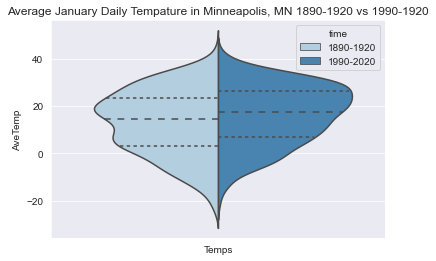

In [105]:
import matplotlib.pyplot as plt
#violin plot
ax = sns.violinplot(x=['Temps']*len(old_and_present),
                    y="AveTemp",hue='time',data=old_and_present,
                    split=True,palette='Blues',inner="quart",)
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')
                    
                   


    # Draw a nested violinplot and split the violins for easier comparison
#sns.violinplot(x=['Data']*len(tips),y="total_bill", hue="smoker",
               #split=True, inner="quart",
               #palette={"Yes": "y", "No": "b"},
               #data=tips)
#sns.despine(left=True)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


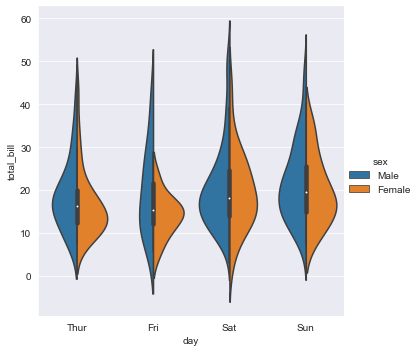

In [93]:
tips = sns.load_dataset("tips")

sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)
tips.head()

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

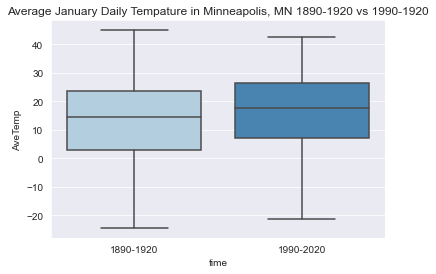

In [76]:
# boxplot
sns.color_palette('deep')
sns.set_style('darkgrid')

ax = sns.boxplot(x="time",y="AveTemp",data=old_and_present,palette='Blues')
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

In [14]:
# groupby average low temp and plot
#jan.groupby('year')['MinTemp'].mean()
# df for average low temps
ave_jan_low = jan.groupby('year')['MinTemp'].mean()
ave_jan_low = ave_jan_low.to_frame()
ave_jan_low = ave_jan_low.reset_index()

In [15]:
# plot
style.use('fivethirtyeight')
sns.lmplot(x='year',y='MinTemp', data=ave_jan_low)
grid=True

NameError: name 'style' is not defined